# Подбор коров при помощи моделей машинного обучения

Владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада, и для этого он заключил контракт с ассоциацией пастбищ «ЭкоФерма».

Нашу IT-компанию наняли помочь фермеру с подбором подходящих коров, используя модели машинного обучения. Главные критерии фермера - коровы должны давать не менее 6000 килограммов молока в год, а надой был вкусным - строго по его критериям.

Перед нами стоят задачи разработать 2 прогнозные модели:
- Первая будет прогнозировать возможный удой коровы (Целевой признак `Удой`)
- Вторая будет рассчитывать вероятность получить вкусное молоко от коровы (Целевой признак `Вкус молока`)

На основе прогнозов этих двух моделей будут приниматься решения о покупке той или иной коровы.

**Описание данных**

1. `ferma_main.csv` содержит данные о стаде фермера на текущий момент.
 - id — уникальный идентификатор коровы.
 - Удой, кг — масса молока, которую корова даёт в год (в килограммах).
 - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
 - Сырой протеин, г — содержание сырого протеина в корме (в граммах).
 - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
 - Порода — порода коровы.
 - Тип пастбища — ландшафт лугов, на которых паслась корова.
 - порода папы_быка — порода папы коровы.
 - Жирность,% — содержание жиров в молоке (в процентах).
 - Белок,% — содержание белков в молоке (в процентах).
 - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


2. `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. 
 - id — уникальный идентификатор коровы.
 - Имя Папы — имя папы коровы.


3. `cow_buy.csv` это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.
 - Порода — порода коровы.
 - Тип пастбища — ландшафт лугов, на которых паслась корова.
 - порода папы_быка — порода папы коровы.
 - Имя_папы — имя папы коровы.
 - Текущая_жирность,% — содержание жиров в молоке (в процентах).
 - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Загрузка данных

In [2]:
def dataset_info(ds, info=True): # Универсальная функция презентации данных
    print('Количество дубликатов:', ds.duplicated().sum())
    print('Длина датасета:', len(ds))
    display(ds.head())
    if info: 
        ds.info()
        display(ds.describe())

Для начала загрузим и ознакомимся со всеми данными.

In [3]:
try:  # Загрузка датасета с информацией о текущем стаде фермера
    ds_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
except:
    ds_main = pd.read_csv('datasets/ferma_main.csv', sep=';')
dataset_info(ds_main)

Количество дубликатов: 5
Длина датасета: 634


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

,id,"Удой, кг","Сырой протеин, г"
count,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,1922.682965
std,183.096982,1638.401021,182.392548
min,1.000000,5204.000000,1660.000000
25%,159.250000,5751.750000,1772.250000
50%,317.500000,6130.500000,1880.500000
75%,475.750000,6501.000000,2058.750000
max,629.000000,45616.000000,2349.000000


In [4]:
try:  # Загрузка датасета с информацией об отце каждой коровы в стаде фермера
    ds_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
except:
    ds_dad = pd.read_csv('datasets/ferma_dad.csv', sep=';')
dataset_info(ds_dad, False)
ds_dad.info()

Количество дубликатов: 0
Длина датасета: 629


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [5]:
try: # Загрузка датасета с коровами, которых фермер хочет купить
    ds_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    ds_buy = pd.read_csv('datasets/cow_buy.csv', sep=';')
dataset_info(ds_buy)

Количество дубликатов: 4
Длина датасета: 20


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,4","3,074",более_2_лет
freq,11,11,12,8,3,5,15


Сразу переименуем все столбцы в более удобный для использования формат

In [6]:
ds_main.columns = ['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'пастбище', 'порода_пб', 'жирность', 'белок', 'вкус', 'возраст']
ds_main.columns # Переименование столбцов. Вручную приводим к нижнему регистру и упрощаем названия для быстрого доступа при работе с данными

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'пастбище',
       'порода_пб', 'жирность', 'белок', 'вкус', 'возраст'],
      dtype='object')

In [7]:
ds_dad.columns = ['id', 'имя_папы']
ds_dad.columns

Index(['id', 'имя_папы'], dtype='object')

In [8]:
ds_buy.columns = ['порода', 'пастбище', 'порода_пб', 'имя_папы', 'жирность', 'белок', 'возраст']
ds_buy.columns

Index(['порода', 'пастбище', 'порода_пб', 'имя_папы', 'жирность', 'белок',
       'возраст'],
      dtype='object')

Пропусков нигде нет, зато есть несколько полных дубликатов в данных, а также неверно определены некоторые численные переменные. Разберёмся со всем этим на этапе предобработки.

##  Предобработка данных

Начнём с дубликатов. Датасет `ds_main` содержит в себе 5 полных дубликатов (Включая уникальный id), их можно сразу удалить.

In [9]:
ds_main = ds_main.drop_duplicates() # Сброс полных дубликатов и проверка
ds_main.duplicated().sum()

0

Теперь мы можем совместить датасеты `ds_main` и `ds_dad`, чтобы не работать с большим количеством маленьких датасетов

In [10]:
ds_main = ds_main.merge(ds_dad, on='id') # Объединение ds_main и ds_dad по id
dataset_info(ds_main, False)

Количество дубликатов: 0
Длина датасета: 629


,id,удой,эке,протеин,спо,порода,пастбище,порода_пб,жирность,белок,вкус,возраст,имя_папы
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет,Буйный
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет,Соловчик
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет,Барин
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет,Буйный
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет,Барин


На дубликаты датасета `ds_buy` лучше посмотрим поближе. В нём гораздо меньше записей, а также отсутствует уникальный идентификатор. Не хотелось-бы избавляться от коров, которые просто очень похожи друг на друга.

In [11]:
ds_buy[ds_buy.duplicated(keep=False)] # Вывод всех дублирующихся записей

,порода,пастбище,порода_пб,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Совпадение в породе, типе пастбища и имени папы ещё можно счесть за совпадение, но идентичная жирность и содержание белка в молоке уже можно назвать закономерностью. Тем не менее, эти данные не будут использоваться при обучении модели, а лишние 4 предсказания модель не сломают. Оставим дубликаты исключительно на случай, если это в действительности удивительное совпадение.

Теперь типы данных. Некоторые числовые сведения в обоих датасетах сохранились в виде строк. Преобразуем их в числовой тип.

In [12]:
for i in ['жирность', 'белок', 'эке', 'спо']: # Для каждого столбца из списка, все запятые меняются на точки, строки переводятся в числовой тип данных
    ds_main[i] = pd.to_numeric(ds_main[i].replace(',', '.', regex=True))
dataset_info(ds_main)

Количество дубликатов: 0
Длина датасета: 629


,id,удой,эке,протеин,спо,порода,пастбище,порода_пб,жирность,белок,вкус,возраст,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         629 non-null    int64  
 1   удой       629 non-null    int64  
 2   эке        629 non-null    float64
 3   протеин    629 non-null    int64  
 4   спо        629 non-null    float64
 5   порода     629 non-null    object 
 6   пастбище   629 non-null    object 
 7   порода_пб  629 non-null    object 
 8   жирность   629 non-null    float64
 9   белок      629 non-null    float64
 10  вкус       629 non-null    object 
 11  возраст    629 non-null    object 
 12  имя_папы   629 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 68.8+ KB


,id,удой,эке,протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [13]:
for i in ['жирность', 'белок']: # Для каждого столбца из списка, все запятые меняются на точки, строки переводятся в числовой тип данных
    ds_buy[i] = pd.to_numeric(ds_buy[i].replace(',', '.', regex=True))
dataset_info(ds_buy)

Количество дубликатов: 4
Длина датасета: 20


,порода,пастбище,порода_пб,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   порода     20 non-null     object 
 1   пастбище   20 non-null     object 
 2   порода_пб  20 non-null     object 
 3   имя_папы   20 non-null     object 
 4   жирность   20 non-null     float64
 5   белок      20 non-null     float64
 6   возраст    20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,жирность,белок
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


Теперь все типы данных в порядке, пропусков нет, опасные дубликаты удалены. На этом предобработку данных можно заканчивать.

## Исследовательский анализ данных

Для начала разделим все столбцы датасета с текущим стадом на строковые и числовые. Так будет проще создавать правильные графики для каждого столбца.

In [14]:
ds_main_numeric = [] # Список названий столбцов с числовыми данными
ds_main_string = [] # Список названий столбцов со строковыми данными
for i in ds_main.columns:
    if ds_main[i].dtype == 'O':
        ds_main_string.append(i)
    elif i != 'id':
        ds_main_numeric.append(i)
print(ds_main_string, ds_main_numeric)

['порода', 'пастбище', 'порода_пб', 'вкус', 'возраст', 'имя_папы'] ['удой', 'эке', 'протеин', 'спо', 'жирность', 'белок']


### Числовые данные

Теперь построим гистограммы для всех числовых столбцов.

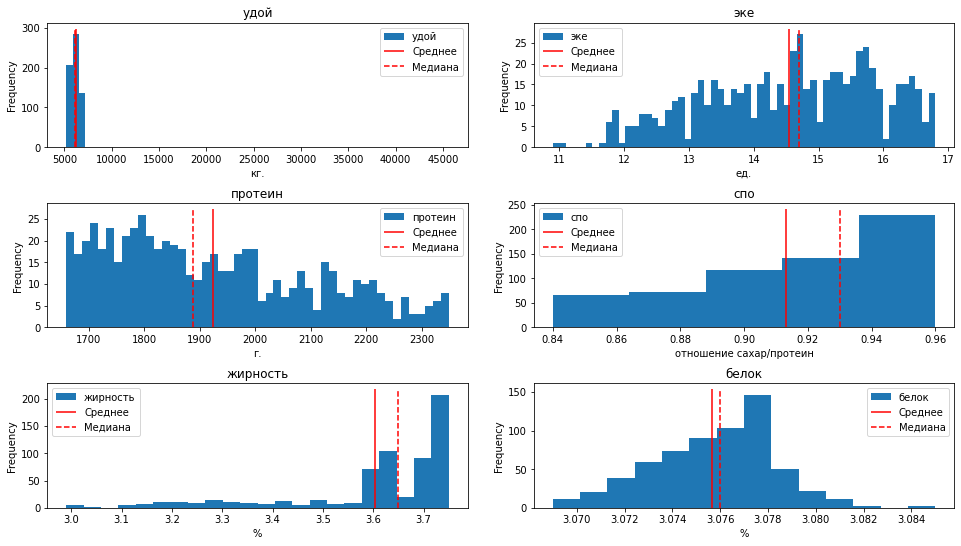

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8)) # Получение расположения сабплотов
fig.tight_layout(pad=3.5) # Расстояние между графиками
bins_list = [60, 58, 48, 5, 22, 14] # Список показателей bins для каждого графика
label_list = ['кг.', 'ед.', 'г.', 'отношение сахар/протеин', '%', '%']
for i in range(len(ds_main_numeric)): # Вывод гистограммы для каждого числового показателя в данных
    bins = ds_main[ds_main_numeric[i]].plot(kind='hist', ax=axes[i//2, i%2], title=ds_main_numeric[i], bins=bins_list[i])
    axes[i//2, i%2].set_xlabel(label_list[i])
    ymin, ymax = axes[i//2, i%2].get_ylim()
    axes[i//2, i%2].vlines(x=ds_main[ds_main_numeric[i]].mean(), colors='red', ymin=ymin, ymax=ymax, label='Среднее')
    axes[i//2, i%2].vlines(x=ds_main[ds_main_numeric[i]].median(), colors='red', ymin=ymin, ymax=ymax, linestyles='--', label='Медиана')
    axes[i//2, i%2].legend()
plt.show()

В значения удоя явно закралась аномалия, вся масса значений перекошена влево, а значения продолжаются вплоть до 45 тысяч. ЭКЕ и СПО имеют небольшой сдвиг вправо, содержание протеина-же наоборот скошено влево. Жирность имеет за собой длинный след из малого количество значений и сильно скошена вправо, дошло до того, что мода располагается около максимума значений.

45 тысяч килограмм удоя в год выглядят не слишком-то реалистично. Выведем все записи со значением удоя выше 10000.

In [16]:
ds_main[ds_main['удой']>10000]

,id,удой,эке,протеин,спо,порода,пастбище,порода_пб,жирность,белок,вкус,возраст,имя_папы
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиалл,3.22,3.076,вкусно,более_2_лет,Буйный


Наверняка эта корова мировой рекордсмен, обеспечивающая только своим удоем небольшой город. Либо это простая ошибка в данных. В любом случае, в рамках обучения модели она нам будет мешать. Попрощаемся с чемпионом и продолжим двигаться дальше.

In [17]:
ds_main = ds_main[ds_main['удой']<10000]
ds_main[ds_main['id'] == 17]

,id,удой,эке,протеин,спо,порода,пастбище,порода_пб,жирность,белок,вкус,возраст,имя_папы


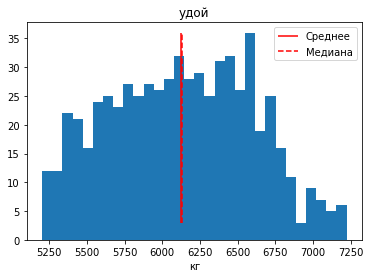

In [18]:
bins = plt.hist(ds_main['удой'], bins=30)
plt.vlines(x=ds_main['удой'].mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=ds_main['удой'].median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('удой')
plt.xlabel('кг')
plt.legend();

Теперь распределение похоже на нормальное

Посмотрим на распределение аномальных значений при помощи диаграммы размаха.

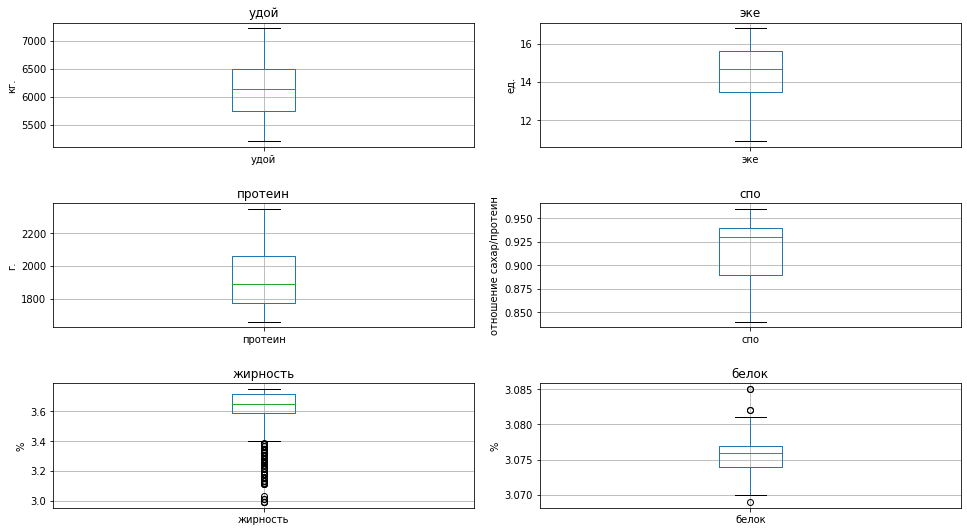

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8)) # Получение расположения сабплотов
fig.tight_layout(pad=3.5) # Расстояние между графиками
label_list = ['кг.', 'ед.', 'г.', 'отношение сахар/протеин', '%', '%']
for i in range(len(ds_main_numeric)): # Создание графика для каждого численного показателя в данных
    ds_main[ds_main_numeric[i]].plot(kind='box', ax=axes[i//2, i%2], title=ds_main_numeric[i], grid=True)
    axes[i//2, i%2].set_ylabel(label_list[i])

Крайне редкие аномальные значения с обеих сторон от медианы у белка, и огромное количество аномально низких значений жирности молока. Однако они не настолько сильно выбиваются из общего списка значений, поэтому оставим аномалии нетронутыми. Все остальные показатели полностью лишены аномальных значений. 

### Нечисловые данные

Теперь разберёмся с нечисловыми данными. Для начала посмотрим на все значения которые они принимают

In [20]:
for i in ds_main_string:
    display(ds_main[i].value_counts()) # Вывод уникальных значений

Вис Бик Айдиал     372
РефлешнСоверинг    256
Name: порода, dtype: int64

Холмистое    350
Равнинное    253
Равнинные     25
Name: пастбище, dtype: int64

Соверин    311
Айдиал     240
Айдиалл     77
Name: порода_пб, dtype: int64

вкусно       370
не вкусно    258
Name: вкус, dtype: int64

более_2_лет    518
менее_2_лет    110
Name: возраст, dtype: int64

Барин       240
Буйный      214
Соловчик    110
Геркулес     64
Name: имя_папы, dtype: int64

Видны неявные дубликаты у типа пастбищ и породы папы-быка - Равнинные и равнинное, Айдиалл и Айдиал. Заменим всё на более популярные значения.

In [21]:
ds_main.loc[ds_main['пастбище'] == 'Равнинные', 'пастбище'] = 'Равнинное'
ds_main['пастбище'].value_counts()

Холмистое    350
Равнинное    278
Name: пастбище, dtype: int64

In [22]:
ds_main.loc[ds_main['порода_пб'] == 'Айдиалл', 'порода_пб'] = 'Айдиал'
ds_main['порода_пб'].value_counts()

Айдиал     317
Соверин    311
Name: порода_пб, dtype: int64

Теперь переведём значения показателей в более удобный для чтения вид.

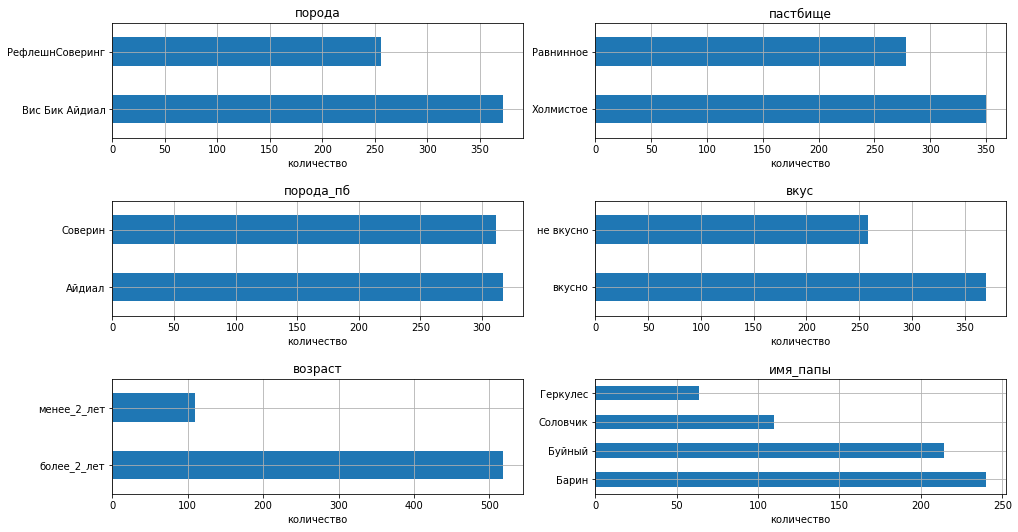

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
fig.tight_layout(pad=4.2)
for i in range(len(ds_main_string)):
    ds_main[ds_main_string[i]].value_counts().plot(kind='barh', ax=axes[i//2, i%2], title=ds_main_string[i], grid=True)
    axes[i//2, i%2].set_xlabel('количество')

Распределение значений выглядит нормально. Самая большая разница между значениями у возраста коров - оно и не удивительно, коровы живут гораздо дольше, чем четыре года.

Итого в рамках исследовательского анализа мы разобрали разные типы значений на соответствующих графиках, избавились от аномалий и неявных дубликатов.

## Корреляционный анализ

Начнём с матрицы корреляции.

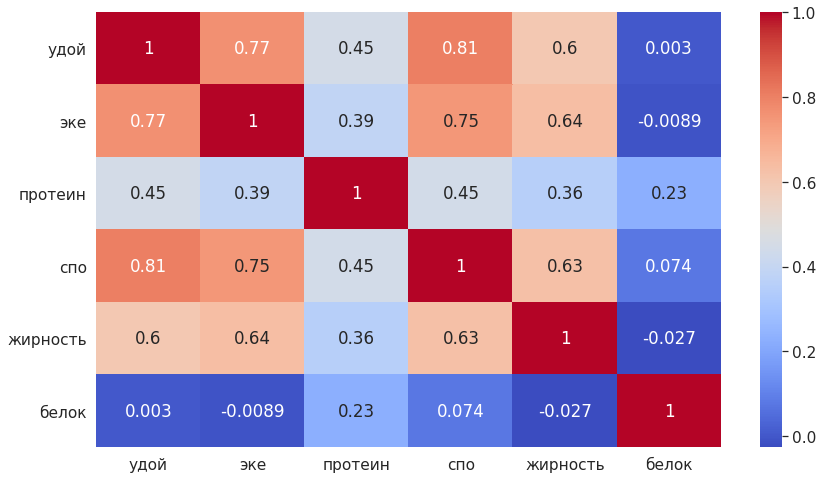

In [24]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.4)
sns.heatmap(ds_main[ds_main_numeric].corr(), annot=True, cmap='coolwarm');
sns.set(font_scale=1)

У нас имеется сильная корреляционная связь между удоем и: 
- энергетической кормовой единицей, 
- соотношением протеина и сахара в корме,
- жирностью молока.

Также удой средне коррелирует с содержанием протеина в молоке, а вот с содержанием белка связь около-нулевая. При этом признаки коррелируют и между собой, но линейной зависимости ни у одного признака нет.

Теперь можем перейти к менее числовым признакам. Это будет потруднее, чем создание матрицы корреляции, но мы справимся. Для начала создадим функцию, которая будет использоваться в будущем цикле перебора параметров.

In [25]:
def scatter_plot_display(x, y, z, ax): # Функция для вывода шести матриц рассеяния для удоя, одного количественного признака и шести категориальных
    colors = ['b', 'g', 'r', 'c', 'm'] # Заготовленный список цветов
    for i in z.unique(): # Перебор уникальных значений текущего категориального признака, каждый заносится на текущий сабплот с цветом списка colors с нулевым индексом
        ax.scatter(x[z == i], y[z == i], color=colors[0], alpha=0.5)
        colors.pop(0) # Значение списка с нулевым индексом удаляется, в следующей итерации используется новый цвет.
        ax.set_title(f'зависимость удоя от {y.name} и {z.name}')
        ax.set_xlabel('удой')
        ax.set_ylabel(y.name)
        ax.legend(z.unique())

А теперь морально готовимся к тонне информации. Мы переберём все числовые значения и расположим их на графиках рассеяния, проверяя зависимость от удоя. При этом к каждому полученному графику мы добавим отображение каждого категориального признака цветовой индикацией точек. Это всего-то 5*6=30 графиков.

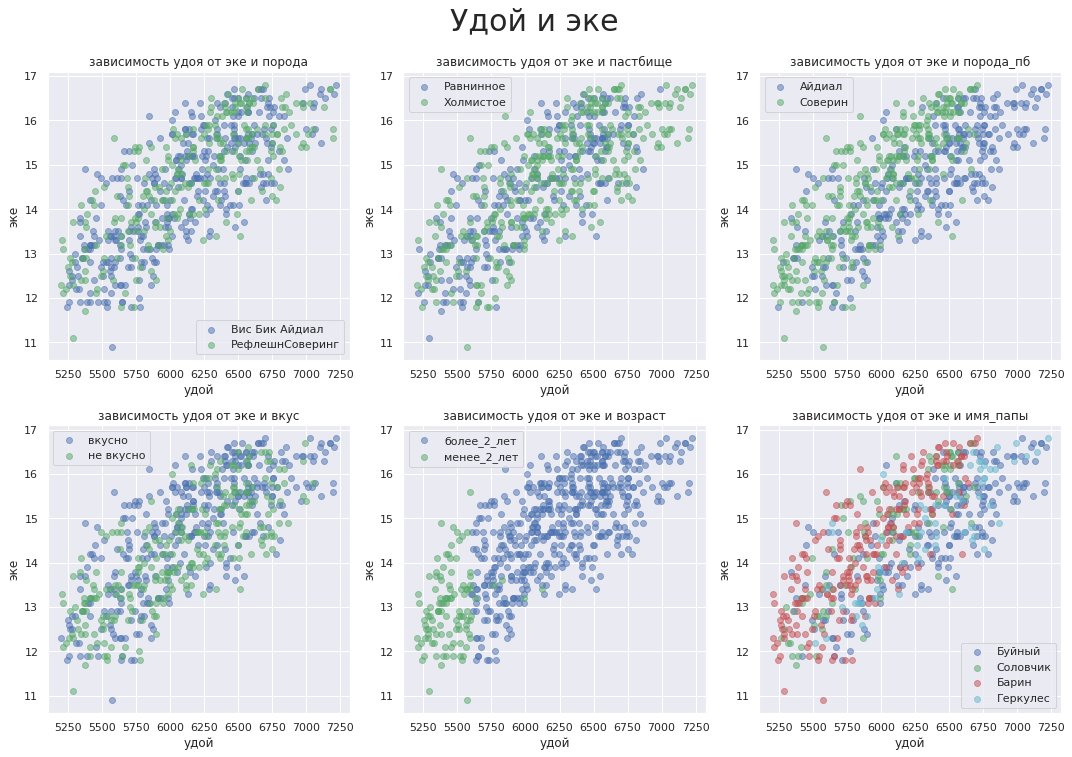

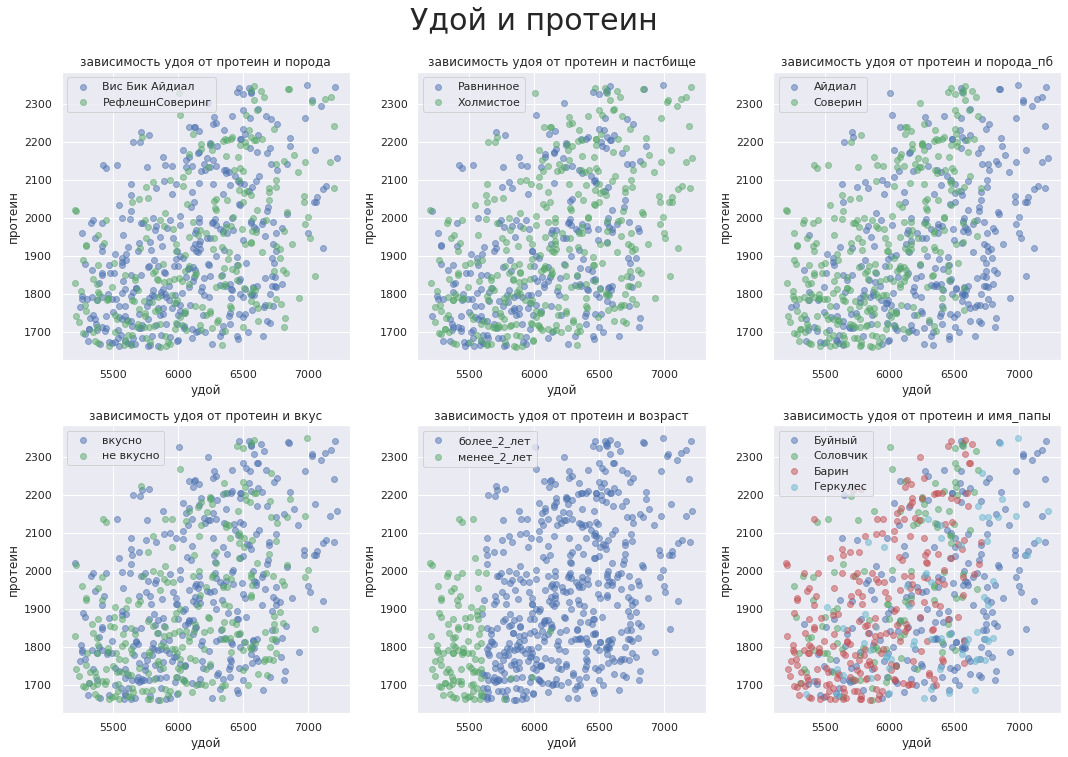

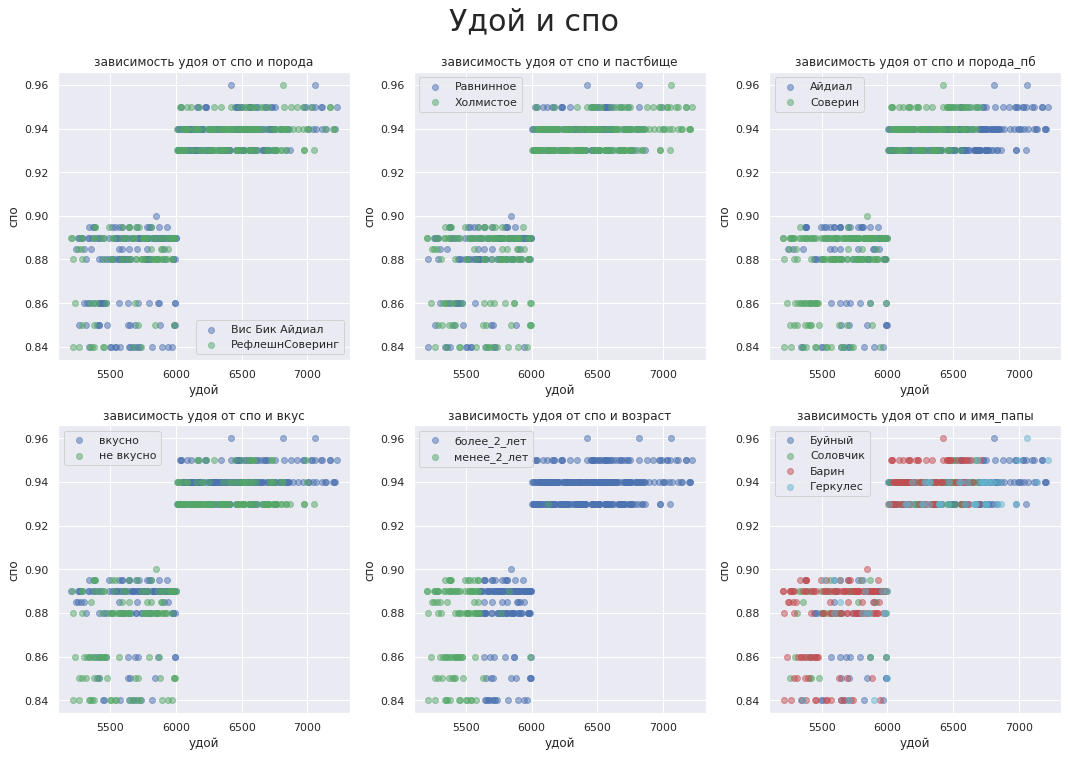

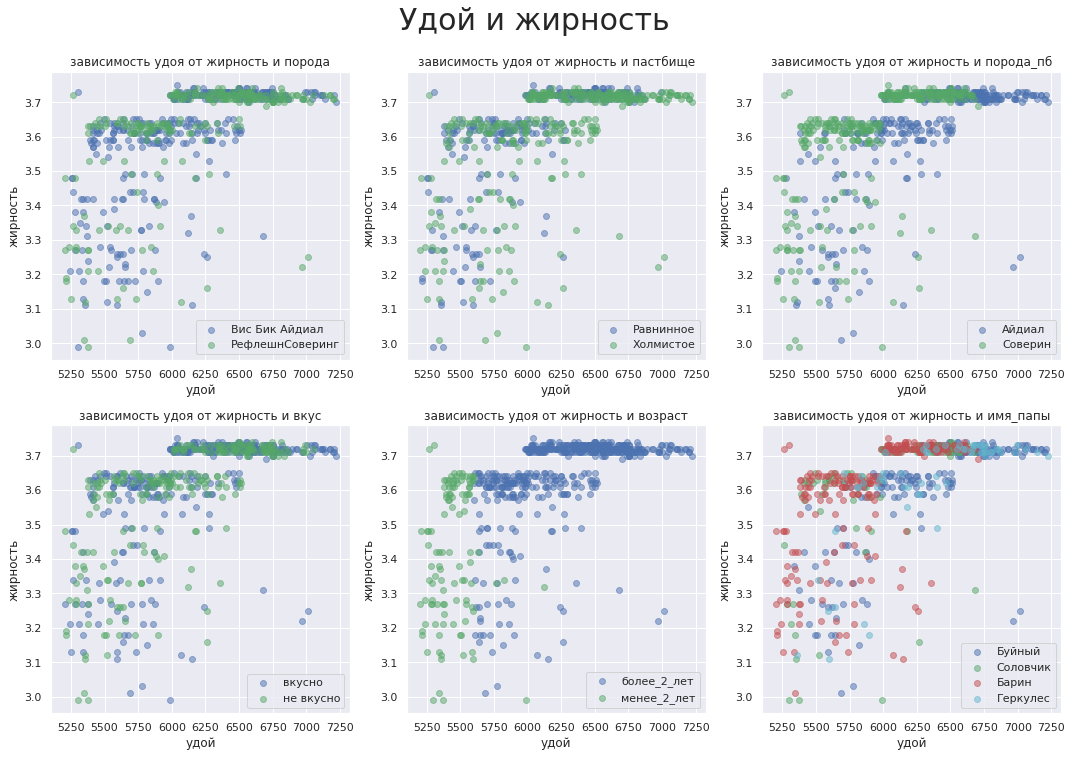

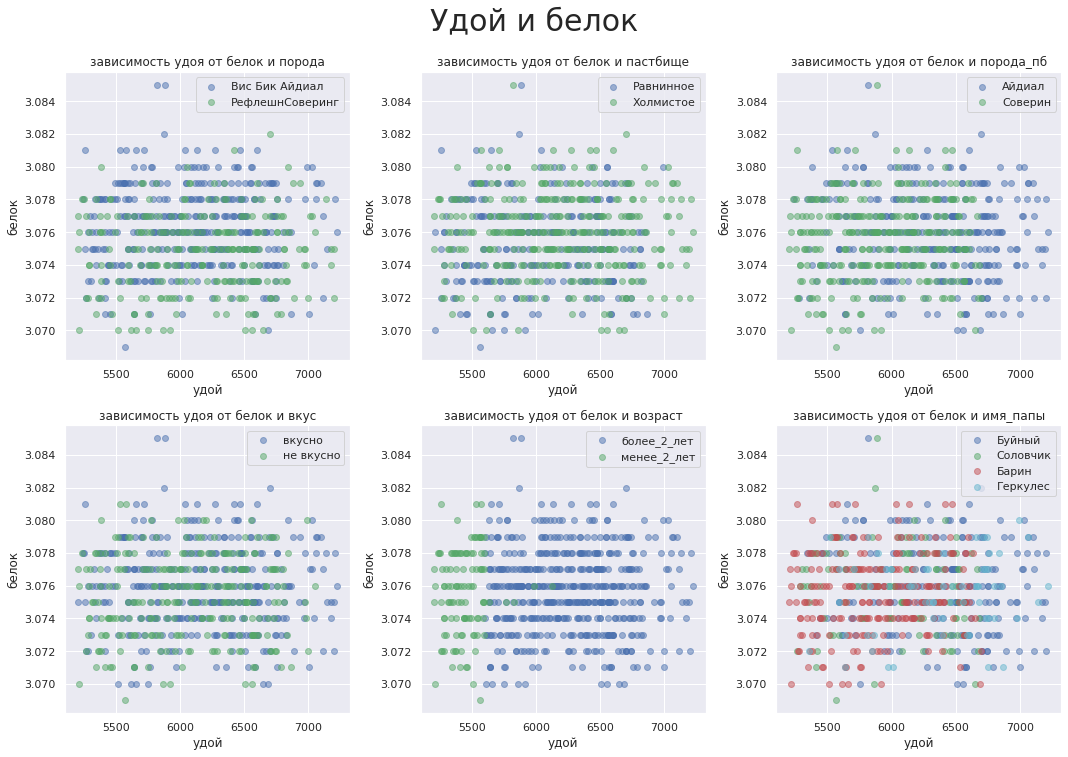

In [26]:
for i in ds_main_numeric[1:]: # Перебор всех числовых показателей(кроме удоя с нулевым индексом)
    fig, axs = plt.subplots(2, 3, figsize=(15, 10)) # Создание расположения сабплотов
    index = 0 # счётчик
    for j in ds_main_string: # Перебор всех категориальных значений, вызов функции с текущими значениями наблюдаемых признаков.
        scatter_plot_display(ds_main['удой'], ds_main[i], ds_main[j], axs[index // 3, index % 3])
        index += 1
    plt.tight_layout()
    fig.suptitle(f'Удой и {ds_main[i].name}', y=1.05, fontsize=30)
    plt.show()

Отлично, мы выжили, а теперь к разбору полученных графиков. 

**Энергетическая кормовая единица**
- Первую закономерность можно увидеть на третьем сабплоте первого массива графиков - на высоких значениях ЭКЕ коровы, чей отец породы Айдиал, начинают приносить больше молока, чем коровы с отцом породы Соверин. 
- Дальше далеко идти не надо, на пятом сабплоте первого массива можно увидеть, что коровы старше 2 лет в среднем дают больше молока, но и кормят их лучше (Параметр ЭКЕ выше)
- Следующий, шестой сабплот, показывает, что рекордсменами по удою являются исключительно коровы, рождённые от быков Буйный и Геркулес, в это время Соловчик и Барин показывают результаты хуже.
- Все остальные категориальные признаки показывают равномерное распределение. Между ними нет четкой зависимости.
- При этом на всех графиках видна одна и та-же закономерность - чем выше ЭКЕ, тем выше удой

**Содержание протеина в корме**
- Точно так-же, коровы старше 2 лет дают больше молока, при этом их кормят б**о**льшим количеством протеина.
- Высокое содержание протеина в корме благополучно влияет на показатель удоя, но прямой зависимости между ними нет.

**СПО(Сахаро-протеиновое соотношение)**
- На графиках зависимости СПО можно заметить, что показатель, хоть и является числовым, по сути ближе к категориальному признаку из-за часто повторяющихся значений. Из-за этого график рассеяния испещрён ровными линиями.
- При этом видна чёткая закономерность - чем выше СПО, тем выше удой. 
- Из категориальных признаков на удой благополучно влияет возраст коровы, порода отца Айдиал и имя отца Буйный или Геркулес.

**Жирность молока**
- Высокие значения благополучно влияют на показатель удоя.
- Коровы породы Рефлешн-Соверинг, судя по всему, дают более жирное молоко.
- Пасущиеся на холмистых пастбищах коровы тоже дают более жирное молоко.
- Коровы старше 2 лет чаще дают более жирное молоко.

**Содержание белка в молоке**
- Подобно СПО, значения содержания белка часто повторяются, и по структуре немного схожи с категориальным признаком.
- Прослеживаются те-же зависимости с возрастом, породой и именем папы-быка, что и в предыдущих наборах графиков.

Подведём итоги по корреляционному анализу.

Большинство числовых признаков прямо влияют на показатель удоя, при этом возраст коровы старше 2 лет почти гарантирует высокий удой. Также прямо влияет на удой показатель жирности молока, ЭКЕ и СПО. В целом - между целевым признаком и входными присутствует прямая взаимосвязь.

Нелинейная взаимосвязь возможно имеет место быть между удоем и СПО. График показал слишком идеальную картину с корреляцией в 0.8.

Мультиколлениарность также присутствует, например между ЭКЕ и СПО прямая корреляция в 0.75, а между жирностью и ЭКЕ 0.64. Но это не те значения о которых стоило-бы беспокоиться, в рамках обучения моделей такая корреляция входных признаков не должна повлиять на результат.

## Обучение модели линейной регрессии

### Первая модель прогнозирования удоя

Для начала отберём из датасета те признаки, которые будут полезны при обучении модели. 
- Параметры корма - ЭКЕ, СПО и протеин, прямо влияют на показатель удоя, и это логично. 
- Жирность молока показала корреляцию в 0.6, и её мы тоже берём. А вот содержание белка ни на матрице корреляции, ни на диаграммах рассеяния никак не взаимосвязан с удоем, им можно пренебречь. 
- Из категориальных признаков на удой сильно повлиял возраст коровы, а также в меньшей степени порода папы-быка. Всеми остальными признаками при обучении первой модели мы пренебрежем.

#### Подготовка данных

In [27]:
data_lr_first = ds_main[['удой', 'эке', 'спо', 'протеин', 'жирность', 'возраст', 'порода_пб']] 
dlf_numeric = ['эке', 'спо', 'протеин', 'жирность']
dlf_string = ['возраст', 'порода_пб']
data_lr_first.head()

,удой,эке,спо,протеин,жирность,возраст,порода_пб
0,5863,14.2,0.890,1743,3.58,более_2_лет,Айдиал
1,5529,12.8,0.890,2138,3.54,менее_2_лет,Соверин
2,5810,14.0,0.885,1854,3.59,более_2_лет,Соверин
3,5895,12.4,0.885,2012,3.40,более_2_лет,Айдиал
4,5302,12.8,0.885,1675,3.73,менее_2_лет,Соверин


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    data_lr_first.drop('удой', axis=1), 
    data_lr_first['удой']) # Разбивка на выборки
X_train.head()

,эке,спо,протеин,жирность,возраст,порода_пб
590,15.0,0.94,1868,3.64,более_2_лет,Айдиал
456,11.1,0.88,1925,3.33,менее_2_лет,Соверин
508,16.5,0.94,2123,3.70,более_2_лет,Соверин
561,13.0,0.86,1785,2.99,менее_2_лет,Соверин
12,15.4,0.93,2193,3.72,более_2_лет,Соверин


In [29]:
encoder = OneHotEncoder(sparse=False, drop='first') # Кодирование категориальных данных

X_train_ohe = pd.DataFrame(
    encoder.fit_transform(X_train[dlf_string]), 
    columns=encoder.get_feature_names())

X_test_ohe = pd.DataFrame(
    encoder.transform(X_test[dlf_string]), 
    columns=encoder.get_feature_names())

X_train_ohe.head()

,x0_менее_2_лет,x1_Соверин
0,0.0,0.0
1,1.0,1.0
2,0.0,1.0
3,1.0,1.0
4,0.0,1.0


In [30]:
scaler = StandardScaler() # Масштабирование численных данных

X_train_scale = pd.DataFrame(
    scaler.fit_transform(X_train[dlf_numeric]), 
    columns=X_train[dlf_numeric].columns)

X_test_scale = pd.DataFrame(
    scaler.transform(X_test[dlf_numeric]), 
    columns=X_test[dlf_numeric].columns)

X_train_scale.head()

,эке,спо,протеин,жирность
0,0.321624,0.806454,-0.301653,0.181612
1,-2.672754,-1.061611,0.006309,-1.684484
2,1.473308,0.806454,1.076071,0.542792
3,-1.213955,-1.684299,-0.750088,-3.731171
4,0.628739,0.495110,1.454269,0.663186


Теперь объединим кодированные и масштабированные данные в целый тренировочный и тестовый датасет.

In [31]:
X_train = X_train_ohe.join(X_train_scale) 
X_train.head()

,x0_менее_2_лет,x1_Соверин,эке,спо,протеин,жирность
0,0.0,0.0,0.321624,0.806454,-0.301653,0.181612
1,1.0,1.0,-2.672754,-1.061611,0.006309,-1.684484
2,0.0,1.0,1.473308,0.806454,1.076071,0.542792
3,1.0,1.0,-1.213955,-1.684299,-0.750088,-3.731171
4,0.0,1.0,0.628739,0.495110,1.454269,0.663186


In [32]:
X_test = X_test_ohe.join(X_test_scale)
X_test.head()

,x0_менее_2_лет,x1_Соверин,эке,спо,протеин,жирность
0,0.0,0.0,0.091287,0.495110,-0.307056,0.663186
1,0.0,1.0,0.475182,0.806454,1.146308,0.602989
2,0.0,1.0,0.091287,-0.750267,-1.101273,-0.179568
3,1.0,1.0,-1.674628,-2.306988,-0.263833,0.121416
4,0.0,0.0,-0.753281,0.806454,1.524506,0.001022


#### Обучение

In [33]:
model_lr_first = LinearRegression() # Объявление модели линейной регрессии

In [34]:
model_lr_first = model_lr_first.fit(X_train, y_train)
y_pred = model_lr_first.predict(X_test)

## Обучение модели логистической регрессии

## Итоговые выводы